In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime

In [98]:
def importer(filename):
    data = pd.read_csv(filename, sep = "\t")
    
    #print(data.keys())
    
    time = data["time"]
    Susceptable = data['susceptible (total) median']
    Exposed = data['exposed (total) median']
    Infected = data['infectious (total) median']
    Recovered = np.array(data['cumulative recovered (total) median'])
    Fatalities = np.array(data['weeklyFatality (total) median'])
    
    samples = len(time)
    recovered = [0]
    for i in range(0,samples-1):
        recovered.append(Recovered[i+1]-Recovered[i])
    
    return time, Susceptable, Exposed, Infected, recovered, Fatalities

In [104]:
def datacollector(folder):
    ttime = []
    tsus = []
    texp = []
    tinf = []
    trec = []
    tfat = []
    xvar = [] #The file name which corresponds by convention to the independant variable in exp.
    
    
    files = glob.glob(folder + "*.tsv")
    for filename in files:
        time, susceptable, exposed, infected, recovered, fatalities = importer(filename)
        ttime.append(time)
        tsus.append(susceptable)
        texp.append(exposed)
        tinf.append(infected)
        trec.append(recovered)
        tfat.append(fatalities)
        i = filename.find(folder)+len(folder)+1
        j = filename.find(".tsv")
        xvar.append(filename[i:j])

    
    return ttime, tsus, texp, tinf, trec, tfat, xvar
    


In [128]:
def date_formatter(dates):
    for date in dates:
        i = date.find(".")
        month = int(date[0:i])
        day = int(date[i+1: i+3])
        date = datetime.date(2020, month, day)
    return dates 

In [129]:
def cumFat(fatax, folder):
    ttime, tsus, texp, tinf, trec, tfat, dates  = datacollector(folder)
    dates = date_formatter(dates)
    totalFatalities = []
    for fatalities in tfat:
        totalFatalities.append(sum(fatalities))
    
    totalFatalities = np.array(totalFatalities)/10**6
    fatax.scatter(dates, totalFatalities)
    return fatax


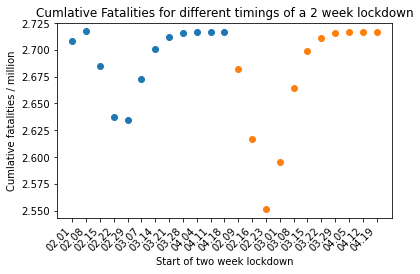

In [130]:
def main():
    folders = ["Timings1week/", "Timings2Weeks/"]
    fatfig, fatax = plt.subplots()
    fatax.set(title="Cumlative Fatalities for different timings of a 2 week lockdown",
              xlabel="Start of two week lockdown",
              ylabel="Cumlative fatalities / million")
    fatfig.autofmt_xdate()
    plt.xticks(rotation=45)           
    
    for folder in folders:
        fatax = cumFat(fatax, folder)
main()
               
    
    